<a href="https://colab.research.google.com/github/latifurrahmanalhamida/PCVK_244107027017_M-LATIFUR/blob/main/Modul_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

M LATIFUR RAHMAN ALHAMIDA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


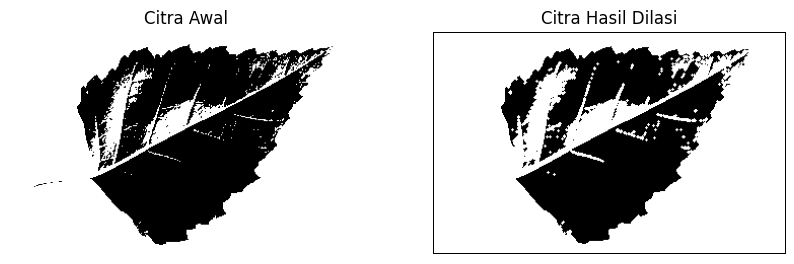

In [3]:
# 3
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk melakukan dilasi manual dengan structuring element 3x3 berbentuk cross
def dilasi_manual(image, struct_elem):
    # Ambil dimensi gambar
    rows, cols = image.shape

    # Buat gambar baru untuk menyimpan hasil dilasi
    dilated_image = np.zeros((rows, cols), dtype=np.uint8)

    # Loop untuk setiap piksel pada gambar
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            # Ambil bagian 3x3 dari gambar
            sub_img = image[i-1:i+2, j-1:j+2]

            # Jika ada piksel foreground di area yang berkorespondensi dengan SE, maka set piksel tengah ke putih
            if np.any(sub_img[struct_elem == 1]):
                dilated_image[i, j] = 255

    return dilated_image

# Baca gambar asli
image = cv2.imread('/content/drive/MyDrive/pcvk/MORFOLOGI.png', cv2.IMREAD_GRAYSCALE)

# Lakukan threshold untuk membuat gambar biner (hitam putih)
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Structuring element 3x3 berbentuk cross
struct_elem = np.array([[0, 1, 0],
                        [1, 1, 1],
                        [0, 1, 0]], dtype=np.uint8)

# Lakukan dilasi manual
dilated_image = dilasi_manual(binary_image, struct_elem)

# Tampilkan gambar asli dan gambar hasil dilasi
plt.figure(figsize=(10, 5))

# Gambar Asli
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Gambar Hasil Dilasi
plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()


Structuring Element (Cross 3x3):
[[0 1 0]
 [1 1 1]
 [0 1 0]]


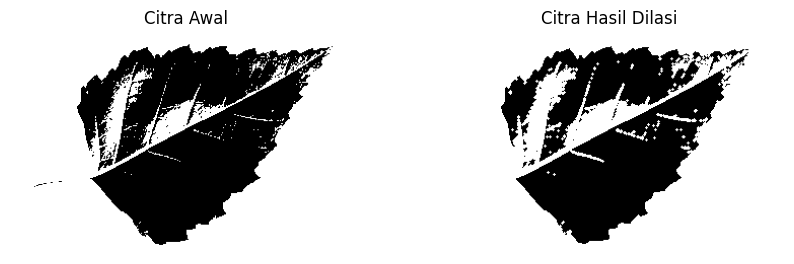

In [4]:
# 4
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar input
image = cv2.imread('/content/drive/MyDrive/pcvk/MORFOLOGI.png', cv2.IMREAD_GRAYSCALE)

# Cek apakah gambar ditemukan
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    # Lakukan threshold untuk membuat gambar biner (hitam putih)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Structuring Element 3x3 berbentuk cross
    struct_elem = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

    # Cetak Structuring Element
    print("Structuring Element (Cross 3x3):")
    print(struct_elem)

    # Operasi dilasi
    dilated_image = cv2.dilate(binary_image, struct_elem)

    # Tampilkan hasil
    plt.figure(figsize=(10, 5))

    # Gambar Asli
    plt.subplot(1, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal')
    plt.axis('off')

    # Gambar Hasil Dilasi
    plt.subplot(1, 2, 2)
    plt.imshow(dilated_image, cmap='gray')
    plt.title('Citra Hasil Dilasi')
    plt.axis('off')

    # Tampilkan gambar
    plt.show()


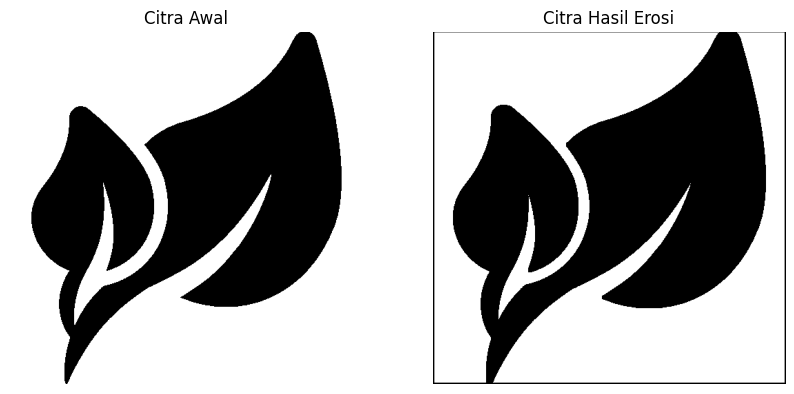

In [6]:
# 5
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk melakukan erosi manual dengan structuring element 5x5 berbentuk square
def erosi_manual(image, struct_elem):
    # Ambil dimensi gambar
    rows, cols = image.shape

    # Buat gambar baru untuk menyimpan hasil erosi
    eroded_image = np.zeros((rows, cols), dtype=np.uint8)

    # Ambil ukuran structuring element
    se_rows, se_cols = struct_elem.shape
    pad_x, pad_y = se_cols // 2, se_rows // 2

    # Loop untuk setiap piksel pada gambar (dengan padding untuk structuring element)
    for i in range(pad_x, rows - pad_x):
        for j in range(pad_y, cols - pad_y):
            # Ambil bagian dari gambar sesuai dengan ukuran SE
            sub_img = image[i - pad_x:i + pad_x + 1, j - pad_y:j + pad_y + 1]

            # Jika semua elemen sub_img yang berkorespondensi dengan SE bernilai 1, set piksel tengah ke putih
            if np.all(sub_img == 255):
                eroded_image[i, j] = 255

    return eroded_image

# Baca gambar asli
image = cv2.imread('/content/drive/MyDrive/pcvk/MORFOLOGI PNG.jpg', cv2.IMREAD_GRAYSCALE)

# Cek apakah gambar ditemukan
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    # Lakukan threshold untuk membuat gambar biner (hitam putih)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Structuring Element 5x5 berbentuk square
    struct_elem = np.ones((5, 5), dtype=np.uint8)

    # Lakukan erosi manual
    eroded_image = erosi_manual(binary_image, struct_elem)

    # Tampilkan hasil
    plt.figure(figsize=(10, 5))

    # Gambar Asli
    plt.subplot(1, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal')
    plt.axis('off')

    # Gambar Hasil Erosi
    plt.subplot(1, 2, 2)
    plt.imshow(eroded_image, cmap='gray')
    plt.title('Citra Hasil Erosi')
    plt.axis('off')

    # Tampilkan gambar
    plt.show()


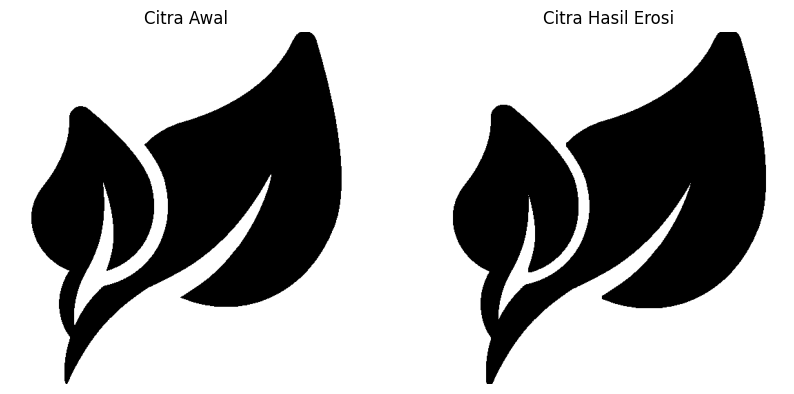

In [8]:
# 6
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar input
image = cv2.imread('/content/drive/MyDrive/pcvk/MORFOLOGI PNG.jpg', cv2.IMREAD_GRAYSCALE)

# Cek apakah gambar ditemukan
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    # Lakukan threshold untuk membuat gambar biner (hitam putih)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Structuring Element 5x5 berbentuk square
    struct_elem = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

    # Operasi erosi menggunakan OpenCV
    eroded_image = cv2.erode(binary_image, struct_elem)

    # Tampilkan hasil
    plt.figure(figsize=(10, 5))

    # Gambar Asli
    plt.subplot(1, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal')
    plt.axis('off')

    # Gambar Hasil Erosi
    plt.subplot(1, 2, 2)
    plt.imshow(eroded_image, cmap='gray')
    plt.title('Citra Hasil Erosi')
    plt.axis('off')

    # Tampilkan gambar
    plt.show()


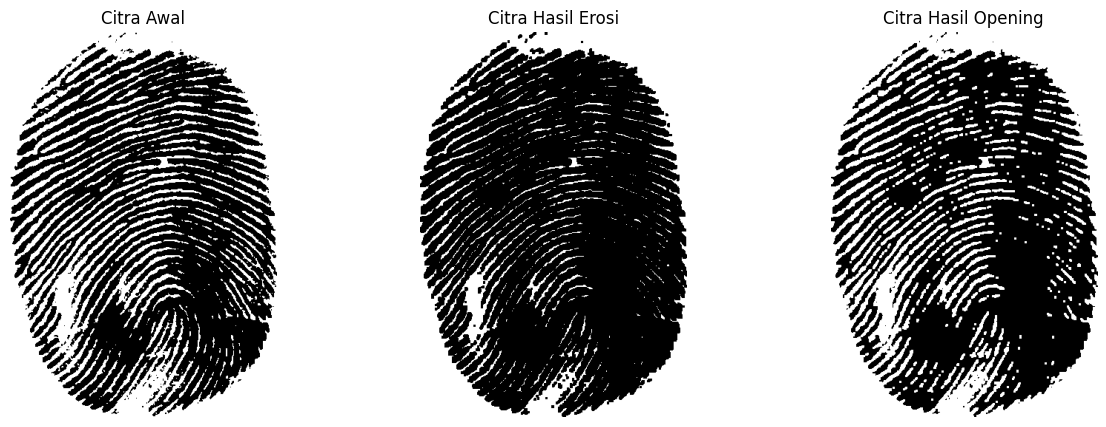

In [9]:
# 7 dengan menggunakan library morphology
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar input
image = cv2.imread('/content/drive/MyDrive/pcvk/SIDIKJARI.png', cv2.IMREAD_GRAYSCALE)

# Cek apakah gambar ditemukan
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    # Lakukan threshold untuk membuat gambar biner (hitam putih)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Structuring Element 3x3 berbentuk square
    struct_elem = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

    # Operasi opening (erosi diikuti dengan dilasi)
    opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, struct_elem)

    # Tampilkan hasil
    plt.figure(figsize=(15, 5))

    # Gambar Asli
    plt.subplot(1, 3, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal')
    plt.axis('off')

    # Gambar Hasil Erosi
    eroded_image = cv2.erode(binary_image, struct_elem)
    plt.subplot(1, 3, 2)
    plt.imshow(eroded_image, cmap='gray')
    plt.title('Citra Hasil Erosi')
    plt.axis('off')

    # Gambar Hasil Opening
    plt.subplot(1, 3, 3)
    plt.imshow(opened_image, cmap='gray')
    plt.title('Citra Hasil Opening')
    plt.axis('off')

    # Tampilkan gambar
    plt.show()


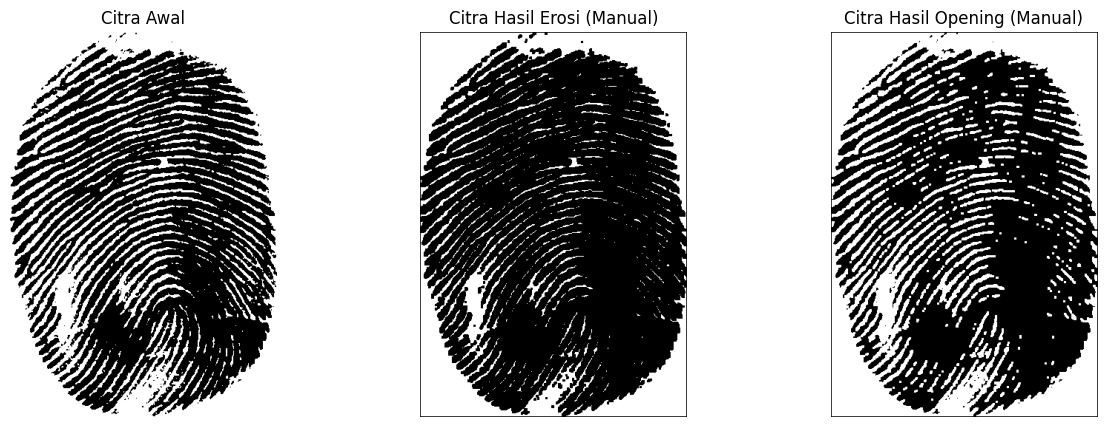

In [10]:
# tidak menggunakan library morphology
# Fungsi untuk melakukan erosi manual
def erosi_manual(image, struct_elem):
    rows, cols = image.shape
    eroded_image = np.zeros((rows, cols), dtype=np.uint8)
    se_rows, se_cols = struct_elem.shape
    pad_x, pad_y = se_cols // 2, se_rows // 2

    for i in range(pad_x, rows - pad_x):
        for j in range(pad_y, cols - pad_y):
            sub_img = image[i - pad_x:i + pad_x + 1, j - pad_y:j + pad_y + 1]
            if np.all(sub_img == 255):
                eroded_image[i, j] = 255

    return eroded_image

# Fungsi untuk melakukan dilasi manual
def dilasi_manual(image, struct_elem):
    rows, cols = image.shape
    dilated_image = np.zeros((rows, cols), dtype=np.uint8)
    se_rows, se_cols = struct_elem.shape
    pad_x, pad_y = se_cols // 2, se_rows // 2

    for i in range(pad_x, rows - pad_x):
        for j in range(pad_y, cols - pad_y):
            sub_img = image[i - pad_x:i + pad_x + 1, j - pad_y:j + pad_y + 1]
            if np.any(sub_img == 255):
                dilated_image[i, j] = 255

    return dilated_image

# Baca gambar input
image = cv2.imread('/content/drive/MyDrive/pcvk/SIDIKJARI.png', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    # Lakukan threshold untuk membuat gambar biner (hitam putih)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Structuring Element 3x3 berbentuk square
    struct_elem = np.ones((3, 3), dtype=np.uint8)

    # Operasi erosi manual
    eroded_image = erosi_manual(binary_image, struct_elem)

    # Operasi dilasi manual setelah erosi (opening)
    opened_image = dilasi_manual(eroded_image, struct_elem)

    # Tampilkan hasil
    plt.figure(figsize=(15, 5))

    # Gambar Asli
    plt.subplot(1, 3, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal')
    plt.axis('off')

    # Gambar Hasil Erosi
    plt.subplot(1, 3, 2)
    plt.imshow(eroded_image, cmap='gray')
    plt.title('Citra Hasil Erosi (Manual)')
    plt.axis('off')

    # Gambar Hasil Opening
    plt.subplot(1, 3, 3)
    plt.imshow(opened_image, cmap='gray')
    plt.title('Citra Hasil Opening (Manual)')
    plt.axis('off')

    # Tampilkan gambar
    plt.show()


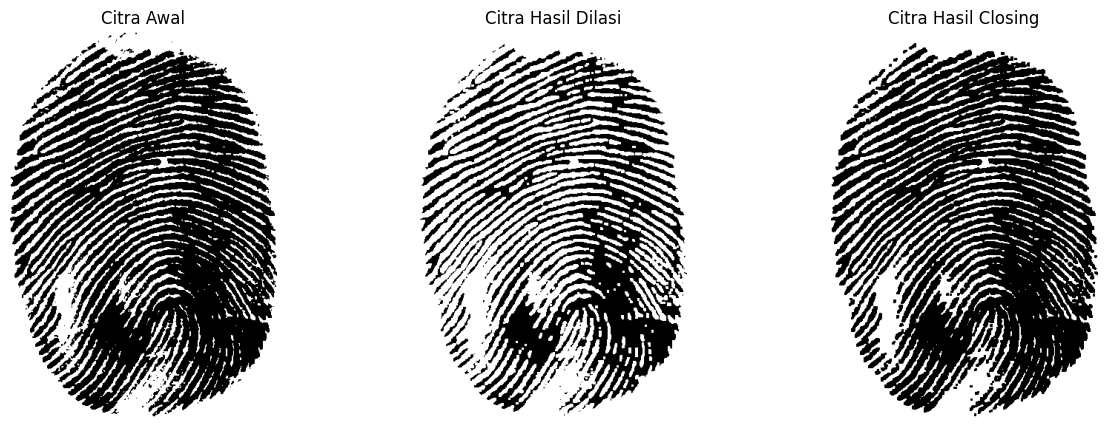

In [11]:
# 8 dengan menggunakan library morphology dari openCV
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar input
image = cv2.imread('/content/drive/MyDrive/pcvk/SIDIKJARI.png', cv2.IMREAD_GRAYSCALE)

# Cek apakah gambar ditemukan
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    # Lakukan threshold untuk membuat gambar biner (hitam putih)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Structuring Element 3x3 berbentuk square
    struct_elem = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

    # Operasi closing (dilasi diikuti dengan erosi)
    closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, struct_elem)

    # Tampilkan hasil
    plt.figure(figsize=(15, 5))

    # Gambar Asli
    plt.subplot(1, 3, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal')
    plt.axis('off')

    # Gambar Hasil Dilasi
    dilated_image = cv2.dilate(binary_image, struct_elem)
    plt.subplot(1, 3, 2)
    plt.imshow(dilated_image, cmap='gray')
    plt.title('Citra Hasil Dilasi')
    plt.axis('off')

    # Gambar Hasil Closing
    plt.subplot(1, 3, 3)
    plt.imshow(closed_image, cmap='gray')
    plt.title('Citra Hasil Closing')
    plt.axis('off')

    # Tampilkan gambar
    plt.show()


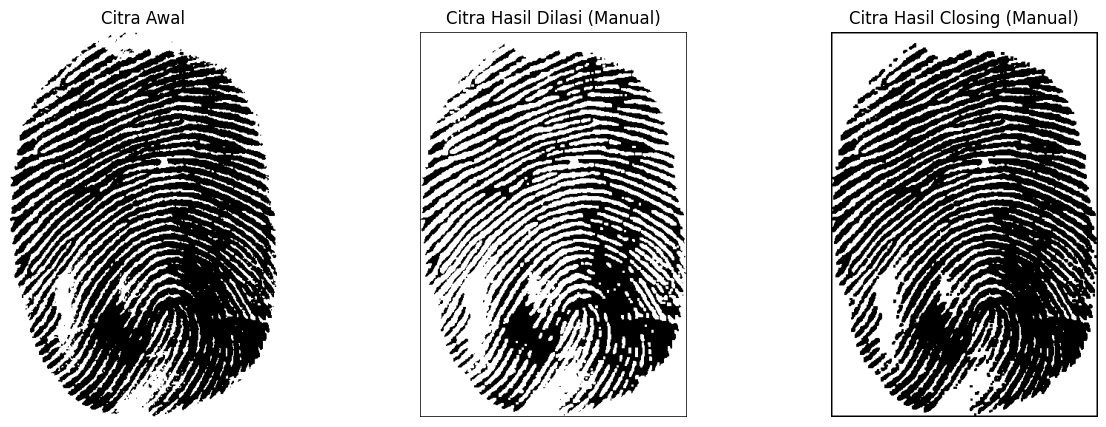

In [12]:
#tidak menggunakan library morphology dari openCV
# Fungsi untuk melakukan erosi manual
def erosi_manual(image, struct_elem):
    rows, cols = image.shape
    eroded_image = np.zeros((rows, cols), dtype=np.uint8)
    se_rows, se_cols = struct_elem.shape
    pad_x, pad_y = se_cols // 2, se_rows // 2

    for i in range(pad_x, rows - pad_x):
        for j in range(pad_y, cols - pad_y):
            sub_img = image[i - pad_x:i + pad_x + 1, j - pad_y:j + pad_y + 1]
            if np.all(sub_img == 255):
                eroded_image[i, j] = 255

    return eroded_image

# Fungsi untuk melakukan dilasi manual
def dilasi_manual(image, struct_elem):
    rows, cols = image.shape
    dilated_image = np.zeros((rows, cols), dtype=np.uint8)
    se_rows, se_cols = struct_elem.shape
    pad_x, pad_y = se_cols // 2, se_rows // 2

    for i in range(pad_x, rows - pad_x):
        for j in range(pad_y, cols - pad_y):
            sub_img = image[i - pad_x:i + pad_x + 1, j - pad_y:j + pad_y + 1]
            if np.any(sub_img == 255):
                dilated_image[i, j] = 255

    return dilated_image

# Baca gambar input
image = cv2.imread('/content/drive/MyDrive/pcvk/SIDIKJARI.png', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    # Lakukan threshold untuk membuat gambar biner (hitam putih)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Structuring Element 3x3 berbentuk square
    struct_elem = np.ones((3, 3), dtype=np.uint8)

    # Operasi dilasi manual
    dilated_image = dilasi_manual(binary_image, struct_elem)

    # Operasi erosi manual setelah dilasi (closing)
    closed_image = erosi_manual(dilated_image, struct_elem)

    # Tampilkan hasil
    plt.figure(figsize=(15, 5))

    # Gambar Asli
    plt.subplot(1, 3, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal')
    plt.axis('off')

    # Gambar Hasil Dilasi
    plt.subplot(1, 3, 2)
    plt.imshow(dilated_image, cmap='gray')
    plt.title('Citra Hasil Dilasi (Manual)')
    plt.axis('off')

    # Gambar Hasil Closing
    plt.subplot(1, 3, 3)
    plt.imshow(closed_image, cmap='gray')
    plt.title('Citra Hasil Closing (Manual)')
    plt.axis('off')

    # Tampilkan gambar
    plt.show()


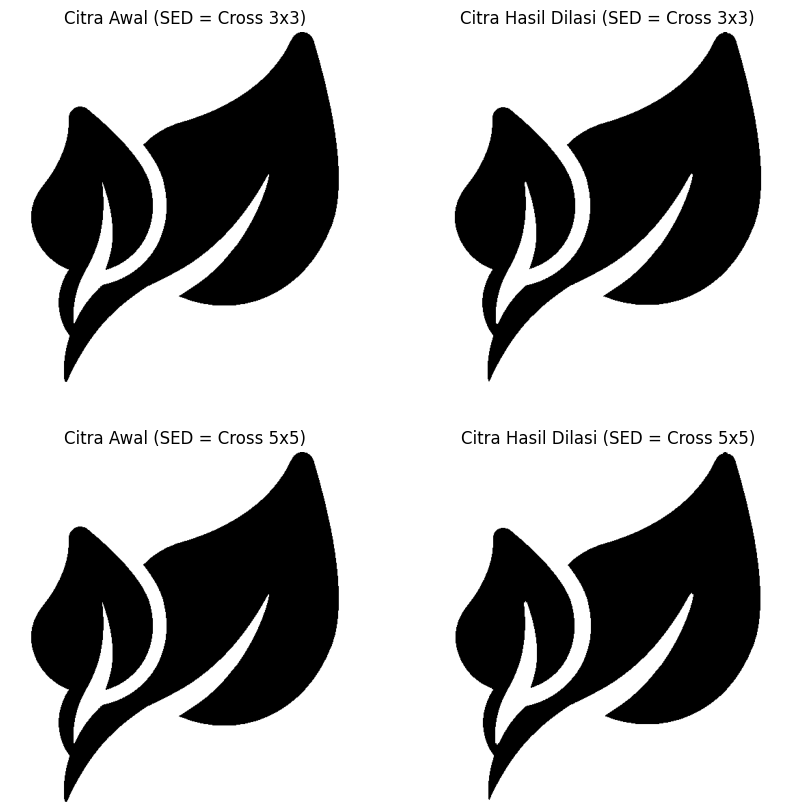

In [14]:
# 9
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar input
image = cv2.imread('/content/drive/MyDrive/pcvk/MORFOLOGI PNG.jpg', cv2.IMREAD_GRAYSCALE)

# Cek apakah gambar ditemukan
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    # Lakukan threshold untuk membuat gambar biner (hitam putih)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Structuring Element berbentuk cross 3x3
    struct_elem_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

    # Structuring Element berbentuk cross 5x5
    struct_elem_5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

    # Operasi dilasi dengan SED 3x3
    dilated_image_3x3 = cv2.dilate(binary_image, struct_elem_3x3)

    # Operasi dilasi dengan SED 5x5
    dilated_image_5x5 = cv2.dilate(binary_image, struct_elem_5x5)

    # Tampilkan hasil
    plt.figure(figsize=(10, 10))

    # Gambar Asli (SED 3x3)
    plt.subplot(2, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal (SED = Cross 3x3)')
    plt.axis('off')

    # Gambar Hasil Dilasi (SED 3x3)
    plt.subplot(2, 2, 2)
    plt.imshow(dilated_image_3x3, cmap='gray')
    plt.title('Citra Hasil Dilasi (SED = Cross 3x3)')
    plt.axis('off')

    # Gambar Asli (SED 5x5)
    plt.subplot(2, 2, 3)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal (SED = Cross 5x5)')
    plt.axis('off')

    # Gambar Hasil Dilasi (SED 5x5)
    plt.subplot(2, 2, 4)
    plt.imshow(dilated_image_5x5, cmap='gray')
    plt.title('Citra Hasil Dilasi (SED = Cross 5x5)')
    plt.axis('off')

    # Tampilkan gambar
    plt.show()


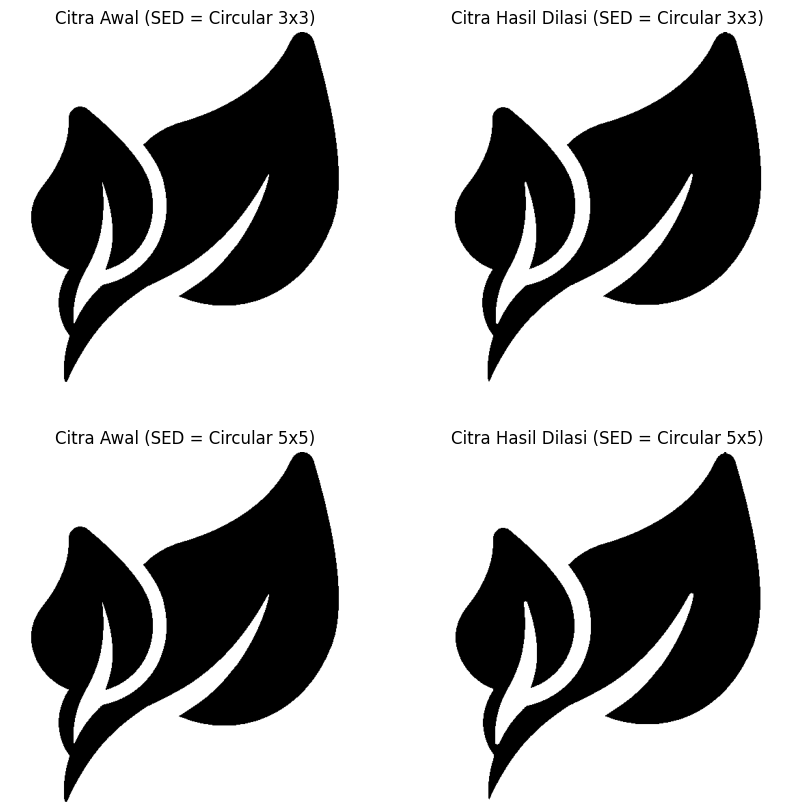

In [15]:
# 10
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar input
image = cv2.imread('/content/drive/MyDrive/pcvk/MORFOLOGI PNG.jpg', cv2.IMREAD_GRAYSCALE)

# Cek apakah gambar ditemukan
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    # Lakukan threshold untuk membuat gambar biner (hitam putih)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Structuring Element berbentuk Circular 3x3
    struct_elem_circle_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

    # Structuring Element berbentuk Circular 5x5
    struct_elem_circle_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

    # Operasi dilasi dengan SED Circular 3x3
    dilated_image_circle_3x3 = cv2.dilate(binary_image, struct_elem_circle_3x3)

    # Operasi dilasi dengan SED Circular 5x5
    dilated_image_circle_5x5 = cv2.dilate(binary_image, struct_elem_circle_5x5)

    # Tampilkan hasil
    plt.figure(figsize=(10, 10))

    # Gambar Asli (SED Circular 3x3)
    plt.subplot(2, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal (SED = Circular 3x3)')
    plt.axis('off')

    # Gambar Hasil Dilasi (SED Circular 3x3)
    plt.subplot(2, 2, 2)
    plt.imshow(dilated_image_circle_3x3, cmap='gray')
    plt.title('Citra Hasil Dilasi (SED = Circular 3x3)')
    plt.axis('off')

    # Gambar Asli (SED Circular 5x5)
    plt.subplot(2, 2, 3)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal (SED = Circular 5x5)')
    plt.axis('off')

    # Gambar Hasil Dilasi (SED Circular 5x5)
    plt.subplot(2, 2, 4)
    plt.imshow(dilated_image_circle_5x5, cmap='gray')
    plt.title('Citra Hasil Dilasi (SED = Circular 5x5)')
    plt.axis('off')

    # Tampilkan gambar
    plt.show()


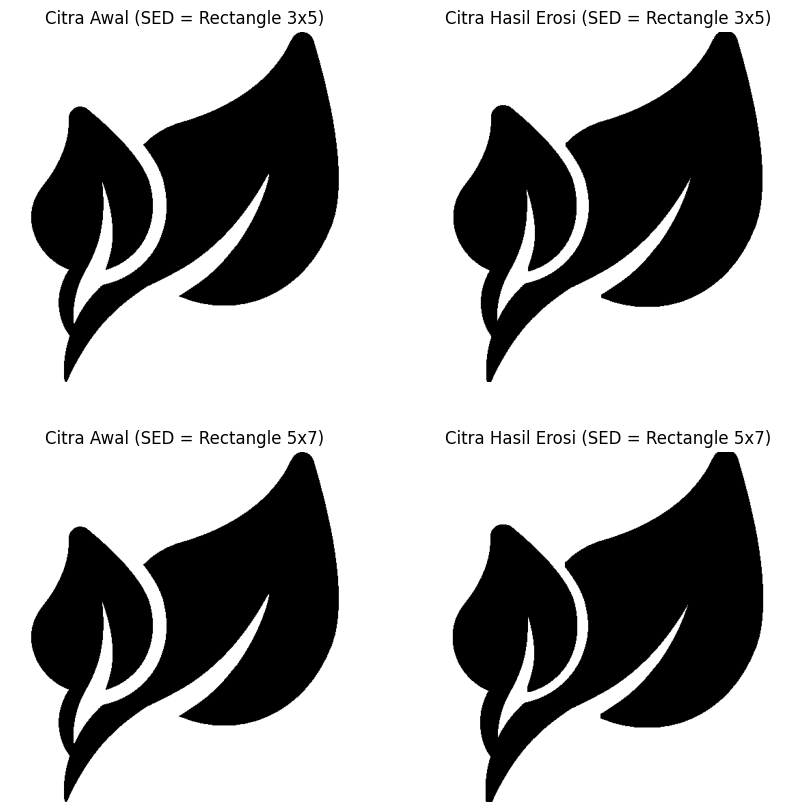

In [16]:
#11
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar input
image = cv2.imread('/content/drive/MyDrive/pcvk/MORFOLOGI PNG.jpg', cv2.IMREAD_GRAYSCALE)

# Cek apakah gambar ditemukan
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    # Lakukan threshold untuk membuat gambar biner (hitam putih)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Structuring Element berbentuk Rectangle 3x5
    struct_elem_rect_3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))

    # Structuring Element berbentuk Rectangle 5x7
    struct_elem_rect_5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))

    # Operasi erosi dengan SED Rectangle 3x5
    eroded_image_rect_3x5 = cv2.erode(binary_image, struct_elem_rect_3x5)

    # Operasi erosi dengan SED Rectangle 5x7
    eroded_image_rect_5x7 = cv2.erode(binary_image, struct_elem_rect_5x7)

    # Tampilkan hasil
    plt.figure(figsize=(10, 10))

    # Gambar Asli (SED Rectangle 3x5)
    plt.subplot(2, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal (SED = Rectangle 3x5)')
    plt.axis('off')

    # Gambar Hasil Erosi (SED Rectangle 3x5)
    plt.subplot(2, 2, 2)
    plt.imshow(eroded_image_rect_3x5, cmap='gray')
    plt.title('Citra Hasil Erosi (SED = Rectangle 3x5)')
    plt.axis('off')

    # Gambar Asli (SED Rectangle 5x7)
    plt.subplot(2, 2, 3)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal (SED = Rectangle 5x7)')
    plt.axis('off')

    # Gambar Hasil Erosi (SED Rectangle 5x7)
    plt.subplot(2, 2, 4)
    plt.imshow(eroded_image_rect_5x7, cmap='gray')
    plt.title('Citra Hasil Erosi (SED = Rectangle 5x7)')
    plt.axis('off')

    # Tampilkan gambar
    plt.show()


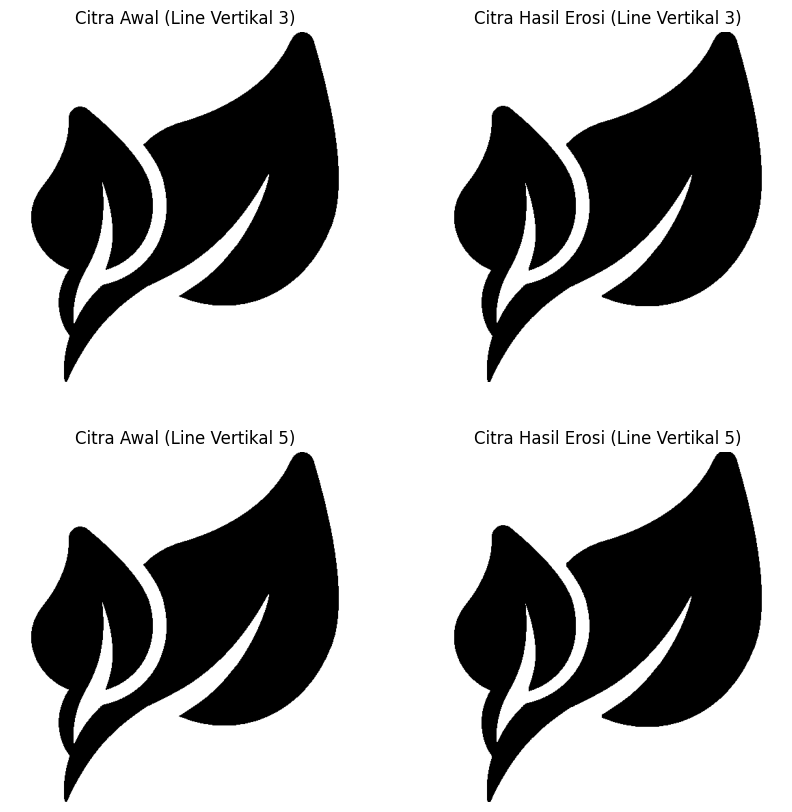

In [1]:
#12
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra asli
image = cv2.imread('/content/drive/MyDrive/pcvk/MORFOLOGI PNG.jpg', cv2.IMREAD_GRAYSCALE)

# Cek apakah gambar ditemukan
if image is None:
    print("Error: Gambar tidak ditemukan!")
else:
    # Lakukan threshold untuk membuat gambar biner (hitam putih)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Structuring Element berbentuk Line Vertikal 3
    struct_elem_line_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))

    # Structuring Element berbentuk Line Vertikal 5
    struct_elem_line_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))

    # Operasi erosi dengan Line Vertikal 3
    eroded_image_line_3 = cv2.erode(binary_image, struct_elem_line_3)

    # Operasi erosi dengan Line Vertikal 5
    eroded_image_line_5 = cv2.erode(binary_image, struct_elem_line_5)

    # Tampilkan hasil
    plt.figure(figsize=(10, 10))

    # Gambar Asli (Line Vertikal 3)
    plt.subplot(2, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal (Line Vertikal 3)')
    plt.axis('off')

    # Gambar Hasil Erosi (Line Vertikal 3)
    plt.subplot(2, 2, 2)
    plt.imshow(eroded_image_line_3, cmap='gray')
    plt.title('Citra Hasil Erosi (Line Vertikal 3)')
    plt.axis('off')

    # Gambar Asli (Line Vertikal 5)
    plt.subplot(2, 2, 3)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Citra Awal (Line Vertikal 5)')
    plt.axis('off')

    # Gambar Hasil Erosi (Line Vertikal 5)
    plt.subplot(2, 2, 4)
    plt.imshow(eroded_image_line_5, cmap='gray')
    plt.title('Citra Hasil Erosi (Line Vertikal 5)')
    plt.axis('off')

    # Tampilkan gambar
    plt.show()
